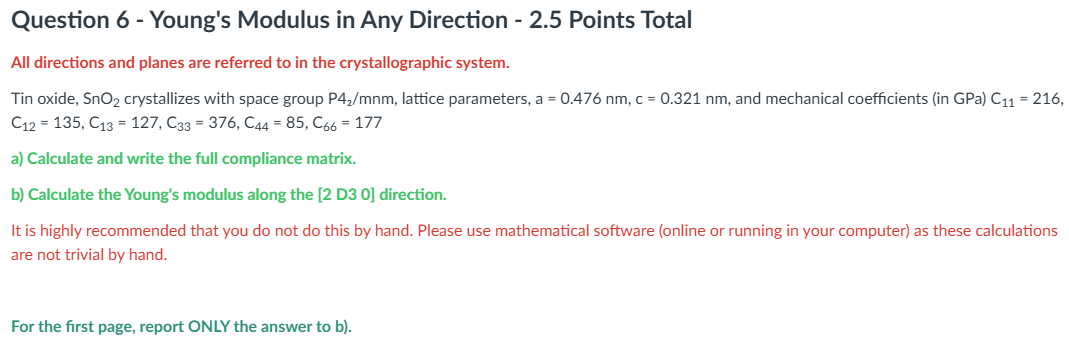



In [58]:
import numpy as np

In [59]:
#Solve for Elasticity
#Set up matrix
SorC = np.zeros((6, 6))

#Are you given stiffness or compliance?
givenCompliance = False #Compliance is S
givenStiffness = True #Stiffness is C

#SorC11
SorC[0,0] = 216

#SorC12
SorC[0,1] = 135

#SorC13
SorC[0,2] = 127

#SorC33
SorC[2,2] = 376

#SorC44
SorC[3,3] = 85

#SorC66
SorC[5,5] = 177

#Code Written by Arman Santana

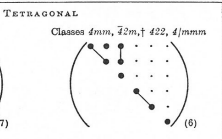

In [60]:
#For tetragonal 4/mmm point group
SorC[1,1] = SorC[0,0]
SorC[1,2] = SorC[0,2]

SorC[4,4] = SorC[3,3]

#now mirror the matrix
SorC[1,0] = SorC[0,1]
SorC[2,0] = SorC[0,2]
SorC[2,1] = SorC[1,2]


In [61]:
if(givenCompliance):
    S = np.zeros((6, 6))
    C = np.zeros((6, 6))
    S = SorC
    C=np.linalg.inv(S)
    
    
    print('Given the Compliance Matrix: \n', S)
    print('Stiffness matrix: \n', C, '\n')

if(givenStiffness):
    S = np.zeros((6, 6))
    C = np.zeros((6, 6))
    C = SorC
    S=np.linalg.inv(C)


    #S[np.isinf(S)] = 0 #Correct divide by zero values (inf)
    print('Given the Stiffness matrix (in GPa): \n', C)
    print('Compliance Matrix in GPa^-1: \n', S, '\n', '\n')

Given the Stiffness matrix (in GPa): 
 [[216. 135. 127.   0.   0.   0.]
 [135. 216. 127.   0.   0.   0.]
 [127. 127. 376.   0.   0.   0.]
 [  0.   0.   0.  85.   0.   0.]
 [  0.   0.   0.   0.  85.   0.]
 [  0.   0.   0.   0.   0. 177.]]
Compliance Matrix in GPa^-1: 
 [[ 0.00805816 -0.00428752 -0.00127359  0.          0.          0.        ]
 [-0.00428752  0.00805816 -0.00127359  0.          0.          0.        ]
 [-0.00127359 -0.00127359  0.00351993  0.          0.          0.        ]
 [ 0.          0.          0.          0.01176471  0.          0.        ]
 [ 0.          0.          0.          0.          0.01176471  0.        ]
 [ 0.          0.          0.          0.          0.          0.00564972]] 
 



In [62]:
print('Identity Matrix: \n')
print(np.dot(S,C)) #This should indicate whether or not there was an error in the setup

Identity Matrix: 

[[ 1.00000000e+00  5.44269491e-17  7.45931095e-17  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.67400815e-16  1.00000000e+00 -6.24500451e-17  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.11996826e-17 -1.43114687e-17  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


## Solve for a11 a12 a13 using G metrix tensor


In [63]:
#uvw is uvw prime and first second third are the basis vectors uvw
uvw = [2,9,0]
first = [1,0,0]
second = [0,1,0]
third = [0,0,1]
uvw = np.array(uvw)
first = np.array(first)
second = np.array(second)
third = np.array(third)

aparam = 0.476
cparam = 0.321

Gmatrix = np.array([[aparam**2, 0, 0], 
                    [0, aparam**2, 0], 
                    [0, 0, cparam**2]])


a11 = np.dot(np.dot(uvw, Gmatrix), first.T)
a11 = a11/(np.sqrt(np.dot(np.dot(uvw, Gmatrix), uvw.T)) * np.sqrt(np.dot(np.dot(first, Gmatrix), first.T)))

a12 = np.dot(np.dot(uvw, Gmatrix), second.T)
a12 = a12/(np.sqrt(np.dot(np.dot(uvw, Gmatrix), uvw.T)) * np.sqrt(np.dot(np.dot(second, Gmatrix), second.T)))

a13 = np.dot(np.dot(uvw, Gmatrix), third.T)
a13 = a13/(np.sqrt(np.dot(np.dot(uvw, Gmatrix), uvw.T)) * np.sqrt(np.dot(np.dot(third, Gmatrix), third.T)))

Amatrix = [a11, a12, a13]

print('Amatrix: \n', Amatrix)

Amatrix: 
 [0.2169304578186562, 0.9761870601839527, 0.0]


## Solve for Youngs Modulus

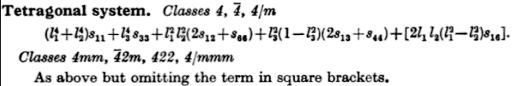

In [64]:
E290 = (a11**4 + a12**4)*S[0,0] + (a13**4)*S[2,2] + (a11**2)*(a12**2)*(2*S[0,1] + S[5,5]) + (a13**2)*(1-a13**2)*(2*S[0,2]+S[3,3])
print('E290: \n', E290, 'GPa')


E290: 
 0.007204247237314167 GPa
